In [1]:
!pip install textblob

In [2]:
!pip install tweepy

In [3]:
import tweepy
from textblob import TextBlob
import pandas as pd

In [4]:
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [6]:
public_tweets = api.search('Prep')

In [7]:
print(TextBlob(public_tweets[0].text).sentiment)

Sentiment(polarity=0.1, subjectivity=0.4)


In [8]:
subjectivityList = []
polarityList = []
tweetsList = []

for i in range(len(public_tweets)):
    tweetsList.append(public_tweets[i].text)
    
    sentiment=TextBlob(public_tweets[i].text).sentiment
    subjectivity= sentiment.subjectivity
    subjectivityList.append(subjectivity)
    
    polarity = sentiment.polarity
    polarityList.append(polarity)
    

In [9]:
tweetsList

['Binge watching Wild N Out as I prep for the show this Friday at State Farm Arena https://t.co/fSU19ScH6k',
 "2)..What I'm finding is the people in denial or the ones totally freaking out like you are have done zero to prepar… https://t.co/cVovlhFCaC",
 'RT @edtechbcoe: Spent time on Friday helping #BangorUnion prep for their awesome STEAM Day activities in April! 🌍 #BeeBot #Ozobot #GreenScr…',
 'Bucks starting to play a lot sharper now. We need these kinds of games to prep for the playoffs.',
 'RT @paperbeatstweet: covid prep tips: stop touching your face\n\npeople who wear glasses: https://t.co/2QUAU87be0',
 'But why didn’t y’all prep me for the distraction of daniel craig’s Knives Out accent?  !!??!! I thought I knew you.',
 'Almost done meal prep... doing laundry in between. Slavery.',
 '@PoloMeho @sdward1 @realDonaldTrump Anything is possible, even the improbable. Prep a month of supplies for entire… https://t.co/OHo5ZfyqLQ',
 'RT @bopinion: The coronavirus has now spread to at l

In [10]:
subjectivityList

[0.4,
 0.75,
 0.55,
 0.1,
 0.5,
 0.0,
 0.0,
 1.0,
 0.5509999999999999,
 0.8125,
 0.7,
 0.0,
 0.0,
 0.0,
 0.4]

In [11]:
polarityList

[0.1,
 0.0,
 0.45,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 -0.045999999999999985,
 0.0,
 0.4,
 0.0,
 0.0,
 0.0,
 -0.1]

In [12]:
sentimentDict = {
            "polarity": polarityList,
             "subjectivity": subjectivityList, 
             "tweets": tweetsList
            }

In [13]:
sentiment_df = pd.DataFrame(sentimentDict)
sentiment_df

,polarity,subjectivity,tweets
0,0.100,0.4000,Binge watching Wild N Out as I prep for the sh...
1,0.000,0.7500,2)..What I'm finding is the people in denial o...
2,0.450,0.5500,RT @edtechbcoe: Spent time on Friday helping #...
3,0.000,0.1000,Bucks starting to play a lot sharper now. We n...
4,0.500,0.5000,RT @paperbeatstweet: covid prep tips: stop tou...
5,0.000,0.0000,But why didn’t y’all prep me for the distracti...
6,0.000,0.0000,Almost done meal prep... doing laundry in betw...
7,0.000,1.0000,@PoloMeho @sdward1 @realDonaldTrump Anything i...
8,-0.046,0.5510,RT @bopinion: The coronavirus has now spread t...
9,0.000,0.8125,"RT @OurShenaniganz: Anything is possible, even..."


In [14]:
for tweet in public_tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)

Binge watching Wild N Out as I prep for the show this Friday at State Farm Arena https://t.co/fSU19ScH6k
Sentiment(polarity=0.1, subjectivity=0.4)
2)..What I'm finding is the people in denial or the ones totally freaking out like you are have done zero to prepar… https://t.co/cVovlhFCaC
Sentiment(polarity=0.0, subjectivity=0.75)
RT @edtechbcoe: Spent time on Friday helping #BangorUnion prep for their awesome STEAM Day activities in April! 🌍 #BeeBot #Ozobot #GreenScr…
Sentiment(polarity=0.45, subjectivity=0.55)
Bucks starting to play a lot sharper now. We need these kinds of games to prep for the playoffs.
Sentiment(polarity=0.0, subjectivity=0.1)
RT @paperbeatstweet: covid prep tips: stop touching your face

people who wear glasses: https://t.co/2QUAU87be0
Sentiment(polarity=0.5, subjectivity=0.5)
But why didn’t y’all prep me for the distraction of daniel craig’s Knives Out accent?  !!??!! I thought I knew you.
Sentiment(polarity=0.0, subjectivity=0.0)
Almost done meal prep... doing la

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy
import pandas as pd

<IPython.core.display.Javascript object>


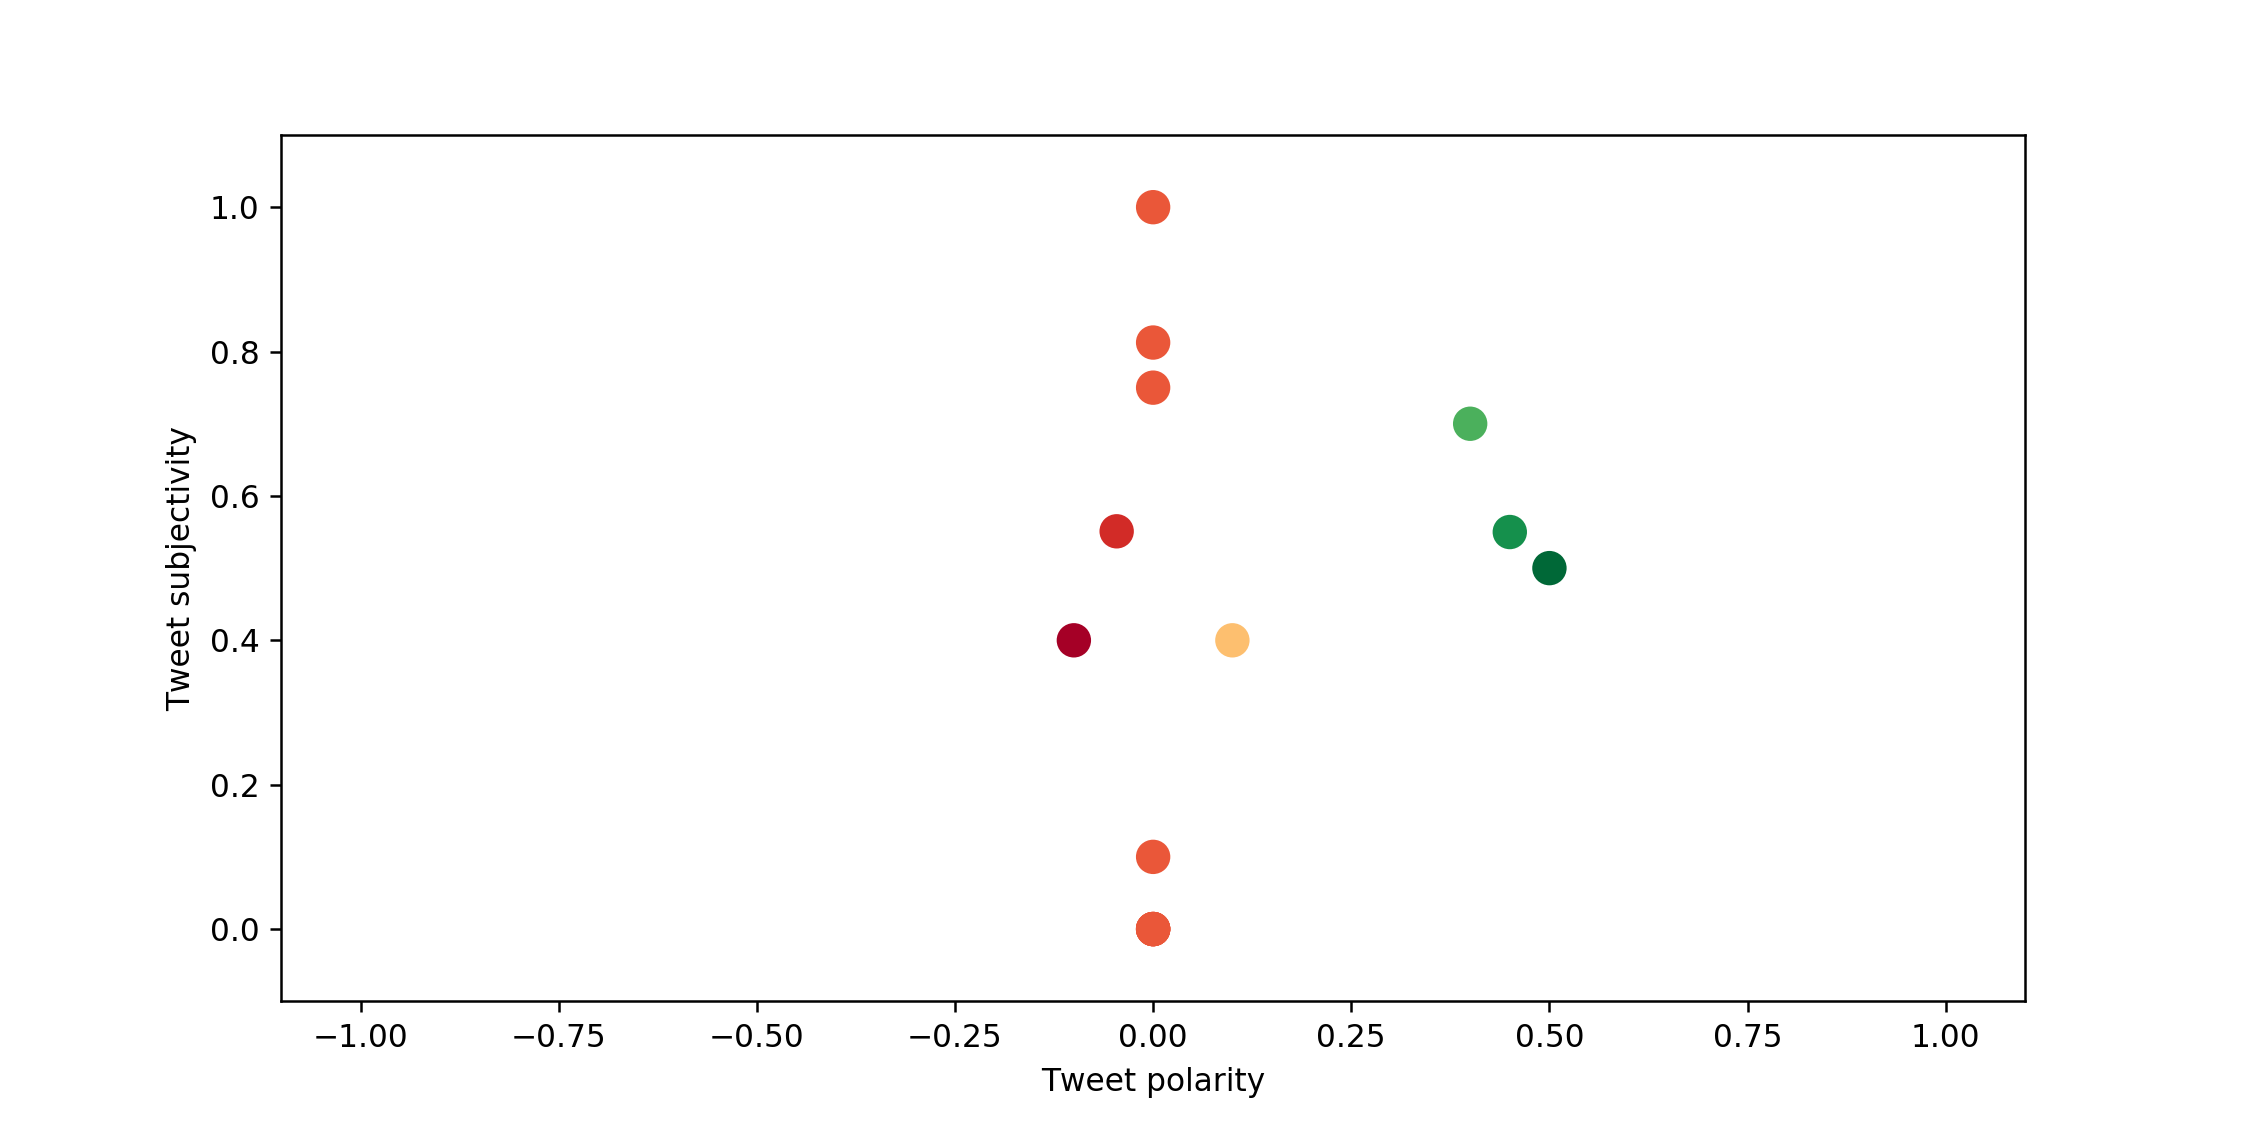

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(sentiment_df.polarity, sentiment_df.subjectivity, c=sentiment_df.polarity, s=100, cmap='RdYlGn')
plt.xlabel('Tweet polarity')
plt.ylabel('Tweet subjectivity')
plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()